# Experimental design figure

In [1]:
import numpy as np
from numpy import array
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sns.set(style="white", context="paper")

In [3]:
%matplotlib inline
mpl.rc("savefig", dpi=150)

In [4]:
def savefig(fig, name):
    fig.savefig("figures/{}.pdf".format(name), dpi=120)
    fig.savefig("figures/{}.png".format(name), dpi=120)
    fig.savefig("tiffs/{}.tiff".format(name), dpi=300)

In [5]:
def fixation_point(ax, color="white"):
    
    gray = ".33"
    ax.add_artist(plt.Rectangle((0, 0), 1, 1, fill=True, facecolor=gray,
                                linewidth=1, edgecolor="white"))
    ax.add_artist(plt.Circle((.5, .5), .012, color=color, zorder=5))
    ax.set(xlim=(0, 1), ylim=(0, 1))  

In [6]:
def cue_frame(ax, which):

    # Parameters of the cue frame
    gray = ".33"
    colors = ".85", ".15"
    pos, size = .05, .9
    width = .06
 
    # Long frame
    if which == 0:
        for i in range(3):
            color = colors[i % 2]
            ax.add_artist(plt.Rectangle((pos, pos), size, size,
                                        fill=True, facecolor=color, linewidth=0))
            pos += width / 3
            size -= (width / 3) * 2

    # Short frame
    else:
        white, black = colors

        # Draw a white rectangle
        ax.add_artist(plt.Rectangle((pos, pos), size, size,
                                    fill=True, facecolor=white, linewidth=0))
        # Draw black dashes over it
        lw = 3.75
        dash = 1.4

        # Vertical sides of the stimulus 
        l, r = pos + width / 2, pos + size - width / 2
        b, t = pos + width, pos + size - width
        ax.plot((l, l), (b, t), ls=":", lw=lw, dashes=[dash, dash], color=black)
        ax.plot((r, r), (b, t), ls=":", lw=lw, dashes=[dash, dash], color=black)

        # Horizontal sides of the stimulus
        l, r = pos + width, pos + size - width
        b, t = pos + width / 2, pos + size - width / 2
        ax.plot((l, r), (b, b), ls=":", lw=lw, dashes=[dash, dash], color=black)
        ax.plot((l, r), (t, t), ls=":", lw=lw, dashes=[dash, dash], color=black)

        # Update the position variables so the
        # center rectangle gets drawn correctly 
        pos += .02 * 3
        size -= .04 * 3

    # Center gray rectangle
    ax.add_artist(plt.Rectangle((pos, pos), size, size,
                                fill=True, facecolor=gray, linewidth=0))

In [7]:
def dot_stimulus(ax, which):    

    # Parameters of the dots -------------------------------------------

    # x positions of the two possible stimuli
    xs = array([[0.19,   0.31,   0.53,   0.68,    0.81,
                 0.18,   0.34,   0.5,    0.66,   0.82,
                 0.195,  0.305,  0.44,   0.69,    0.79,
                 0.175,  0.345,  0.515,  0.63,    0.825,
                 0.2,    0.335,  0.48,   0.6275,  0.8],
                [0.19,   0.31,   0.53,   0.68,    0.82,
                 0.14,   0.34,   0.51,   0.645,   0.81,
                 0.215,  0.305,  0.44,   0.71,    0.79,
                 0.185,  0.345,  0.52,   0.64,    0.83,
                 0.21,    0.335,  0.48,  0.6275,  0.81]])[which]

    # y positions of the two possible stimuli
    ys = array([[0.17,   0.15,   0.175,  0.19,    0.165,
                 0.34,   0.31,   0.33,   0.34,    0.36,
                 0.485,  0.5,    0.53,   0.53,    0.525,
                 0.635,  0.68,   0.66,   0.6725,  0.64,
                 0.82 ,  0.79,   0.81,   0.80 ,   0.78],
                [0.19,   0.15,   0.175,  0.19,    0.165,
                 0.34,   0.31,   0.33,   0.35,    0.36,
                 0.495,  0.5,    0.53,   0.53,    0.525,
                 0.655,  0.68,   0.66,   0.6725,  0.64,
                 0.81 ,  0.79,   0.81,   0.82 ,   0.78]])[which]

    # Colors of the two possible stimuli
    hues = dict(r=(0.93226, 0.53991, 0.26735),
                g=(0., 0.74055, 0.22775))
    cs = [['g', 'g', 'g', 'r', 'r',
           'g', 'r', 'g', 'r', 'g',
           'g', 'g', 'g', 'r', 'r',
           'r', 'r', 'r', 'g', 'g',
           'g', 'g', 'r', 'g', 'g'],
          ['g', 'r', 'g', 'r', 'r',
           'r', 'g', 'r', 'r', 'g',
           'r', 'r', 'g', 'r', 'g',
           'g', 'r', 'r', 'g', 'r',
           'r', 'r', 'g', 'r', 'r']][which]
    cs = [hues[c] for c in cs]

    # Angles of motion of the two possibly stimuli
    thetas = [[90,  184, 123, 186, 205,
               128, 90,  202, 131, 68,
               37,  296, 90,  358, 90,
               90,  166, 49,  146, 291,
               193, 90,  341, 90,  234],
              [220, 80,  5,   65,  162,
               10,  176, 42,  270, 43,
               270, 8,   270, 140, 213,
               270, 212, 163, 270, 244,
               220, 161, 141, 6,   74]][which]

    # Size of the dots
    dot_size = .022

    # Draw the dots -----------------------------------------------------
    for x, y, c in zip(xs, ys, cs):
        x, y = x - (dot_size / 2), y - (dot_size / 2)
        ax.add_artist(plt.Rectangle((x, y), dot_size, dot_size, color=c))
    
    # Parameters for motion representation
    arrow_length = .04
    arrow_start = .022
    arrow_width = .02

    # Draw the arrows to indicate direction of motion
    for x, y, c, theta in zip(xs, ys, cs, thetas):
        theta = np.deg2rad(theta)
        x += arrow_start * np.cos(theta)
        y += arrow_start * np.sin(theta)
        dx = arrow_length * np.cos(theta)
        dy = arrow_length * np.sin(theta)
        color = sns.desaturate(c, .75)
        ax.add_artist(plt.Arrow(x, y, dx, dy, arrow_width, color=color))

In [8]:
def screen(x, y, size=.25, ratio=2, fixcolor="white",
           frame=None, dots=None, text=None):

    # Add the axes for the current screen to the figure
    fig = plt.gcf()
    width, height = size, size / ratio
    x -= width / 2
    y -= height / 2
    ax = fig.add_axes([x, y, width, height], frameon=False)
    ax.set_axis_off()

    # Draw the stimulus
    fixation_point(ax, fixcolor)
    if frame is not None or dots is not None:
        cue_frame(ax, frame)
    if dots is not None:
        dot_stimulus(ax, dots)

    # Add text information (used for timing)
    if text is not None:
        fig.text(x + width, y + height, text,
                 size=8, ha="right", va="bottom")
    return ax

In [9]:
def frequency_manipulation(ax):

    # Load the design
    design = pd.read_csv("data/scan_design.csv")

    # Plot the line of generating color frequency 
    # (note reversed due to bug in design code)
    ax.plot(1 - design.color_freq, ls=":", color=".3", lw=1, dashes=[.75, 1])

    # Set up the positions of the indiviudal trial scatter points
    trial_colors = design.context.map({1: "#9666BD", 0: "#404040"})
    jitterer = np.random.RandomState(99)
    spreader = (np.arange(len(design)) % 4) / 30. - .04
    trial_height = design.context.map({0: .05, 1: .95}) + spreader
    trial_height += jitterer.uniform(-.015, .015, len(design))

    # Draw the trial context scatter
    ax.scatter(design.index, trial_height, 5, trial_colors,
               alpha=.9, linewidth=.2, edgecolor="white")

    # Add semantic labels to the plot
    ax.set_xlabel("Trial", labelpad=.8)
    ax.set_ylabel("p(color trial)", labelpad=2.5)
    ax.set(xlim=(-7, 907), ylim=(-.05, 1.05),
           #yticks=[.1, .3,  .5, .7, .9],
           #yticklabels=[".1", ".3", ".5", ".7", ".9"]
           yticks=[.2, .4,  .6, .8],
           yticklabels=[".2", ".4", ".6", ".8"]
           )
    ax.set_xticks([0, 300, 600, 900])
    ax.set_xticklabels([0, 300, 600, 900], ha="right")
    sns.despine(ax=ax, bottom=True, trim=True)

---

## Draw the figure

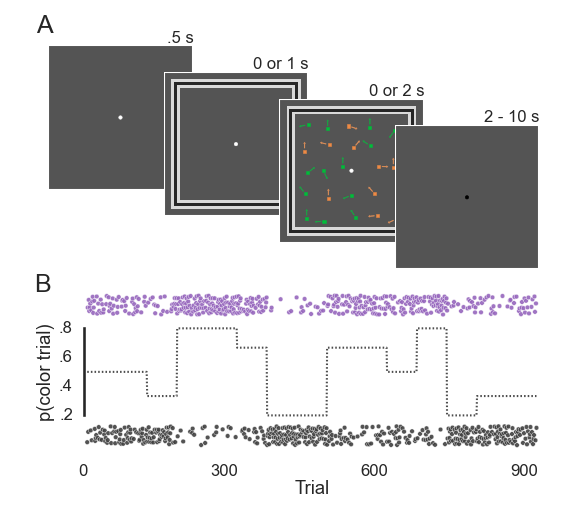

In [10]:
# Size and shape variables
figwidth = 3.5
ratio = .95
size = .275
fig = plt.figure(figsize=(figwidth, figwidth * ratio))

# Positioning variables
top_start = .78
top_end = .62
top = np.linspace(top_start, top_end, 4)

left_start = .18
left_end = .84
left = np.linspace(left_start, left_end, 4)

# Example sequence of an early-cue trial
screen(left[0], top[0], size, ratio, text=".5 s")
screen(left[1], top[1], size, ratio, frame=0, text="0 or 1 s")
screen(left[2], top[2], size, ratio, frame=0, dots=0, text="0 or 2 s")
screen(left[3], top[3], size, ratio, fixcolor="black", text="2 - 10 s")

# Diagram of the context frequency manipulation
f_ax = fig.add_axes([.11, .11, .87, .32])
frequency_manipulation(f_ax)

# Panel labels
fig.text(.02, .95, "A", size=12)
fig.text(.02, .43, "B", size=12)

savefig(fig, "experimental_design")